In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,make_scorer
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the data from CSV file into a Pandas DataFrame
data = pd.read_csv('./Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Check for any duplicate rows in the DataFrame
data.duplicated().any()

False

In [8]:
# Count the occurrences of each unique value in the 'Gender' column
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
# Count the occurrences of each unique value in the 'Age' column
data["Age"].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [10]:
# Count the occurrences of each unique value in the 'Annual Income (k$)' column
data["Annual Income (k$)"].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

In [11]:
# Count the occurrences of each unique value in the 'Spending Score (1-100)' column
data["Spending Score (1-100)"].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

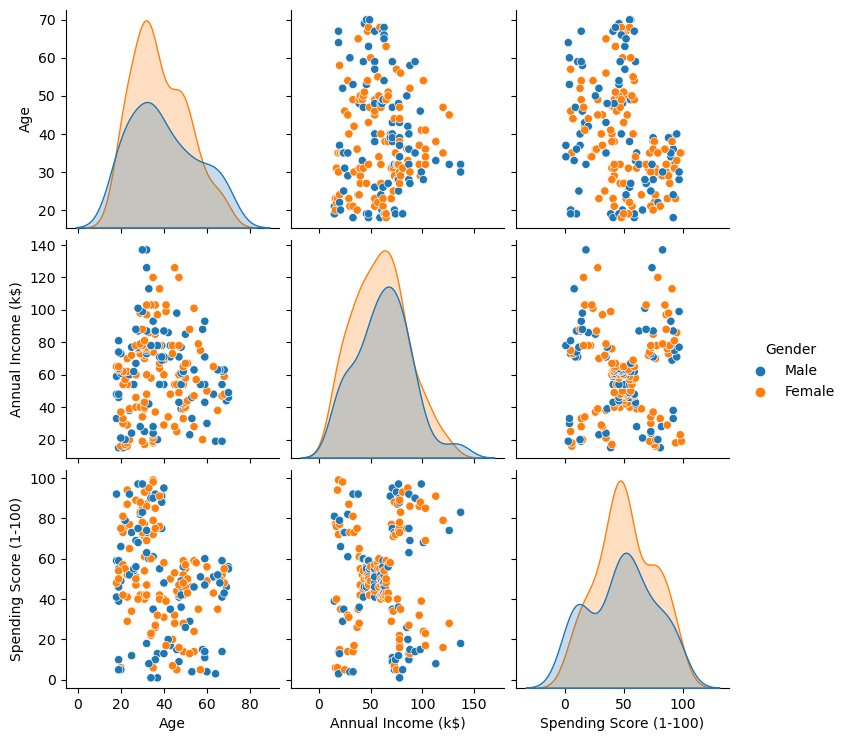

In [12]:
# Create a pairplot to visualize pairwise relationships between features, colored by gender
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender')

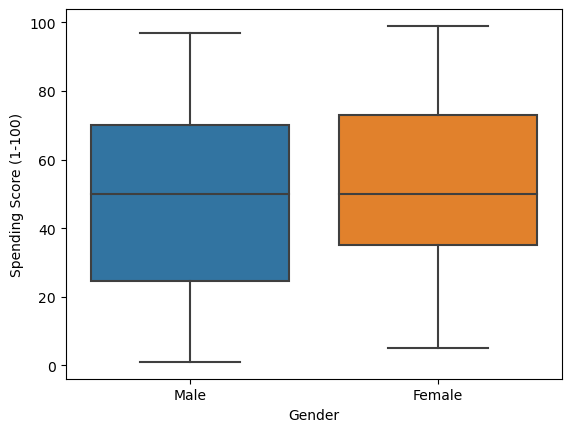

In [13]:
# Create a pairplot to visualize pairwise relationships between features, colored by gender
sns.boxplot(data=data, x='Gender', y='Spending Score (1-100)')

# Display the plot
plt.show()

In [14]:
# Drop unnecessary columns for clustering
data.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

In [15]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)


In [16]:
# steps¶
# We first generate some sample data using make_blobs.
# Then, we create a KMeans model with n_clusters=4 and fit it to the data.
# After fitting the model, we use the predict method to assign each data point to a cluster and retrieve the centroids using the clustercenters attribute.
# Finally, we visualize the clusters by plotting the data points with different colors based on their cluster assignments (c=y_kmeans) and plot the centroids as red points.

data, _ = make_blobs(n_samples=300,  random_state=42)


In [17]:
# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(data)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [18]:
# Predict clusters and find centroids
y_kmeans = kmeans_model.predict(data)
centroids = kmeans_model.cluster_centers_

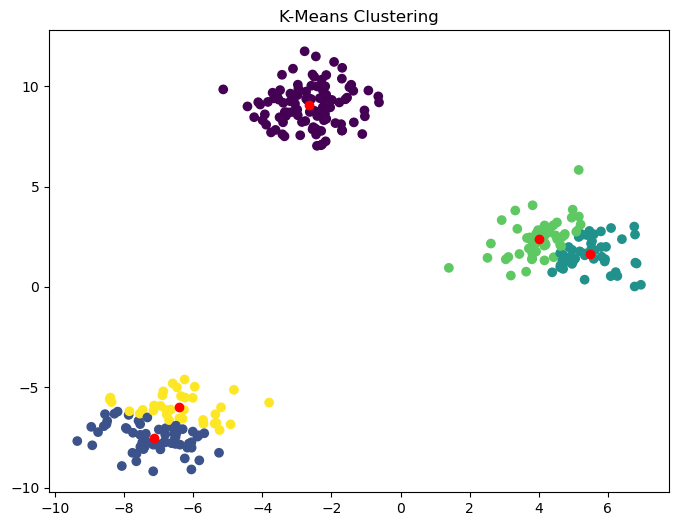

In [19]:
import matplotlib.pyplot as plt

# Visualize clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points with different colors based on their cluster assignments
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red')

plt.title('K-Means Clustering')

# Display the plot
plt.show()


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

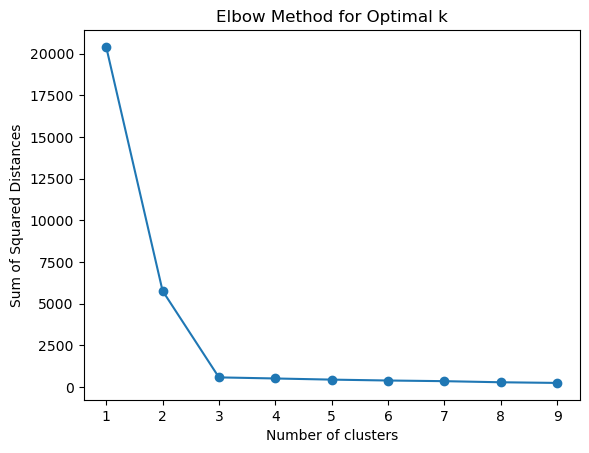

In [20]:
#Elbow Method
sse=[]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()